In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('loans.csv',index_col='client_id')

In [3]:
df.head(10)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
46109,home,6935,0,11501,2006-09-17,2008-11-26,1.94
46109,cash,6177,1,11141,2007-03-12,2009-04-26,9.48
46109,home,12656,0,11658,2006-05-26,2007-10-15,4.14
46109,home,11062,1,11611,2012-09-12,2014-03-14,5.48


In [4]:
df.shape

(443, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [6]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [7]:
df['loan_id']=df['loan_id'].astype('object')

df['repaid']=df['repaid'].astype('category')

In [8]:
df['loan_start']=pd.to_datetime(df['loan_start'],format='%Y-%m-%d')

df['loan_end']=pd.to_datetime(df['loan_end'],format='%Y-%m-%d')

In [9]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [10]:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [11]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [12]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

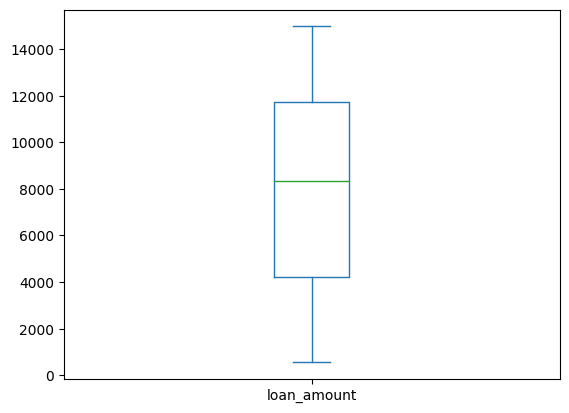

In [13]:
df['loan_amount'].plot(kind='box')
plt.show()

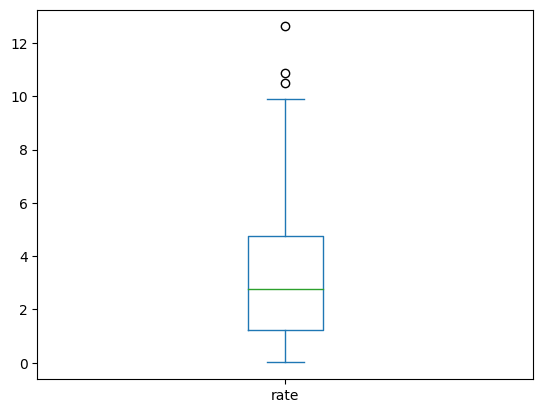

In [14]:
df['rate'].plot(kind='box')
plt.show()

In [15]:
df['sqrt_rate']=np.sqrt(df['rate'])
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181


In [16]:
print("THE SKEWNESS OF THE ORIGINAL DATA IS {}".format(df.rate.skew()))
print("THE SKEWNESS OF THE SQUARED DATA IS {}".format(df.sqrt_rate.skew()))

THE SKEWNESS OF THE ORIGINAL DATA IS 0.884204614329943
THE SKEWNESS OF THE SQUARED DATA IS 0.04964154055528862


In [17]:
print("THE KURTOSIS OF THE ORIGINAL DATA IS {}".format(df.rate.kurt()))
print("THE KURTOSIS OF THE SQUARED DATA IS {}".format(df.sqrt_rate.kurt()))

THE KURTOSIS OF THE ORIGINAL DATA IS 0.42437165143736433
THE KURTOSIS OF THE SQUARED DATA IS -0.6318437642052039


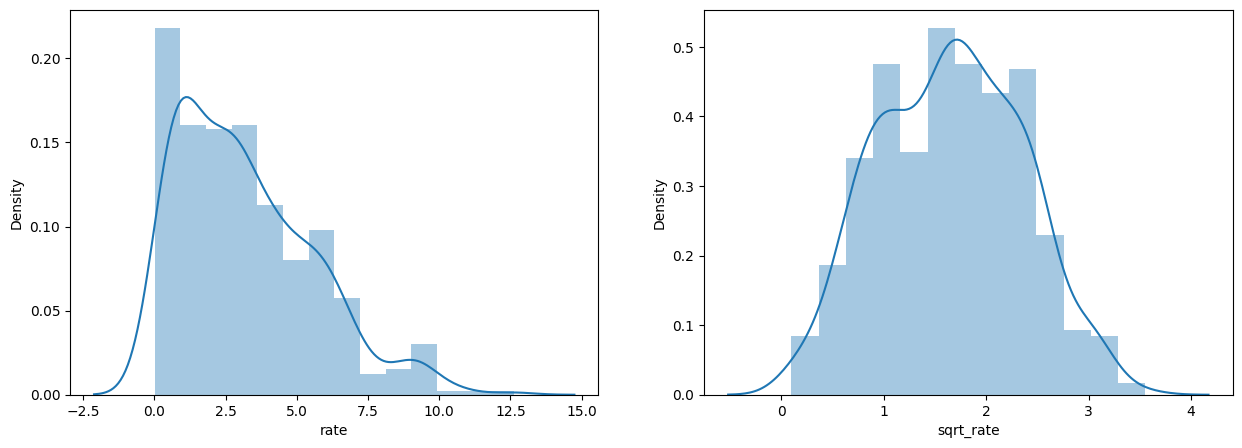

In [18]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['rate'],ax=axes[0])
sns.distplot(df['sqrt_rate'],ax=axes[1])
plt.show()

In [19]:
df['log_rate']=np.log(df['rate'])

In [20]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [21]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.sqrt_rate.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['log_rate'].skew()))

print('')


print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.sqrt_rate.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df['log_rate'].kurt()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewnss of the LOG transformed data is -1.5943217626331552

The kurtosis of the original data is 0.42437165143736433
The kurtosis of the SQRT transformed data is -0.6318437642052039
The kurtosis of the LOG transformed data is 4.157026150198228


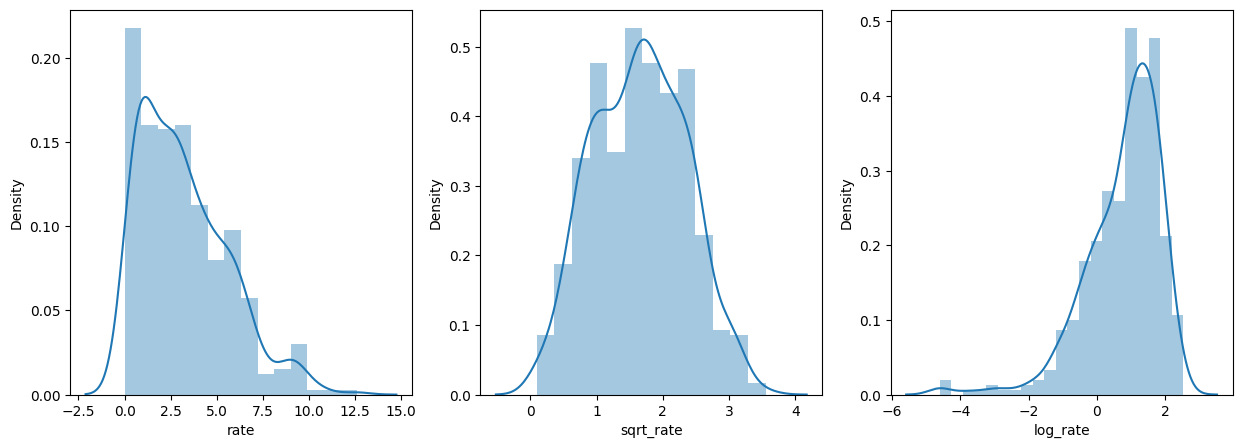

In [22]:
fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'],ax=axes[0])
sns.distplot(df['sqrt_rate'],ax=axes[1])
sns.distplot(df['log_rate'],ax=axes[2])
plt.show()

In [23]:
df['log_rate']=df['rate'].apply(lambda x:np.log(x))

In [24]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,sqrt_rate,log_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.141033


In [25]:
df1=pd.read_csv('loans.csv',index_col='client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [26]:
df1.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [27]:
df1['loan_id']=df1['loan_id'].astype('object')

df1['repaid']=df1['loan_id'].astype('object')


df1['loan_start']=pd.to_datetime(df1['loan_start'],format="%Y-%m-%d")

df1['loan_end']=pd.to_datetime(df1['loan_end'],format="%Y-%m-%d")


In [28]:
df1.dtypes

loan_type              object
loan_amount             int64
repaid                 object
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [29]:
import scipy.stats as stats

In [30]:
df1['ZR']=stats.zscore(df1['rate'])

In [31]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [32]:
df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,10302,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,10224,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,10312,10312,2009-03-14,2011-03-21,12.62,3.926916


In [33]:
df1.head(50)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036399
46109,home,6935,11501,11501,2006-09-17,2008-11-26,1.94,-0.533379
46109,cash,6177,11141,11141,2007-03-12,2009-04-26,9.48,2.615555
46109,home,12656,11658,11658,2006-05-26,2007-10-15,4.14,0.385408
46109,home,11062,11611,11611,2012-09-12,2014-03-14,5.48,0.945033


In [34]:
df1[(df1['ZR']<-3)|(df1['ZR']>3)].shape[0]

3

In [35]:
df2=df1[(df1['ZR']>-3)|(df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [36]:
df1.shape

(443, 8)

In [37]:
df2.shape

(443, 9)

In [38]:
df3 = df2.copy()

In [39]:
df3.drop(columns=['ZR'],inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13


In [40]:
Q1=df3.rate.quantile(0.25)
Q2=df3.rate.quantile(0.50)
Q3=df3.rate.quantile(0.75)

IQR=Q3-Q1

LC=Q1-(1.5*IQR)

UC=Q3+(1.5*IQR)

display(LC)
display(UC)

-4.075

10.045

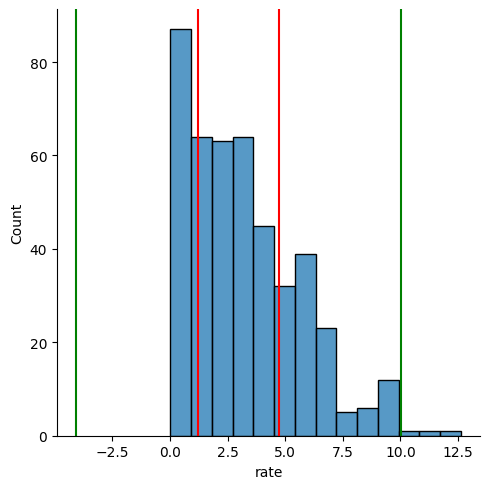

In [41]:
sns.displot(df3.rate)
plt.axvline(Q1,color='r')
plt.axvline(Q3,color='r')
plt.axvline(LC,color='g')
plt.axvline(UC,color='g')
plt.show()

In [42]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

3

In [43]:
df4=df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13


In [44]:
df3.shape

(443, 8)

In [45]:
df4.shape

(440, 8)

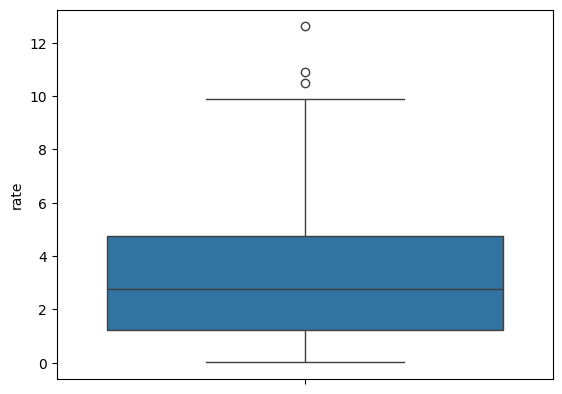

In [46]:
sns.boxplot(df1.rate)
plt.show()

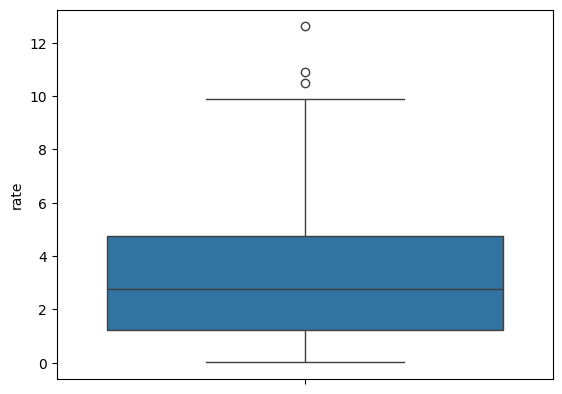

In [47]:
sns.boxplot(df2.rate)
plt.show()

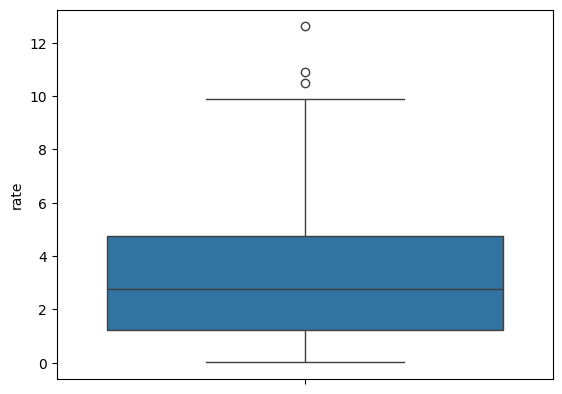

In [48]:
sns.boxplot(df3.rate)
plt.show()

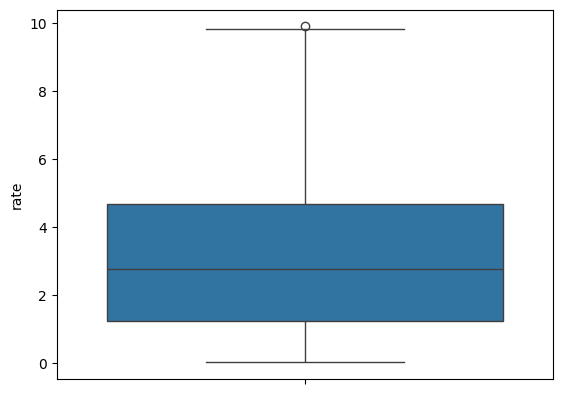

In [49]:
sns.boxplot(df4.rate)
plt.show()

In [50]:
avg_rate=df3['rate'].mean()
avg_rate

3.2171557562076747

In [51]:
std_rate=df3['rate'].std()
std_rate

2.3971676425428297

In [52]:
df3['z-score']=(df3['rate']-avg_rate)/std_rate
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,z-score
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445174
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.820617
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.058397
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.824788
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036358


In [53]:
print("the skewness of the original data is {}".format(df3.rate.skew()))
print("the kurtosis of the original data is {}".format(df3.rate.kurt()))

print("the skewness of the z-score data is {}".format(df3['z-score'].skew()))
print("the kurtosis of the original data is {}".format(df3['z-score'].kurt()))


the skewness of the original data is 0.884204614329943
the kurtosis of the original data is 0.42437165143736433
the skewness of the z-score data is 0.8842046143299428
the kurtosis of the original data is 0.42437165143736566


In [54]:
avg_la=df3['loan_amount'].mean()
avg_la

7982.31151241535

In [55]:
std_la=df3['loan_amount'].std()
std_la

4172.891992006096

In [56]:
df3['z-score_la']=(df3['loan_amount']-avg_la)/std_la

In [57]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,z-score,z-score_la
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445174,1.363488
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.820617,0.434157
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.058397,1.138704
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.824788,1.086941
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036358,1.453833


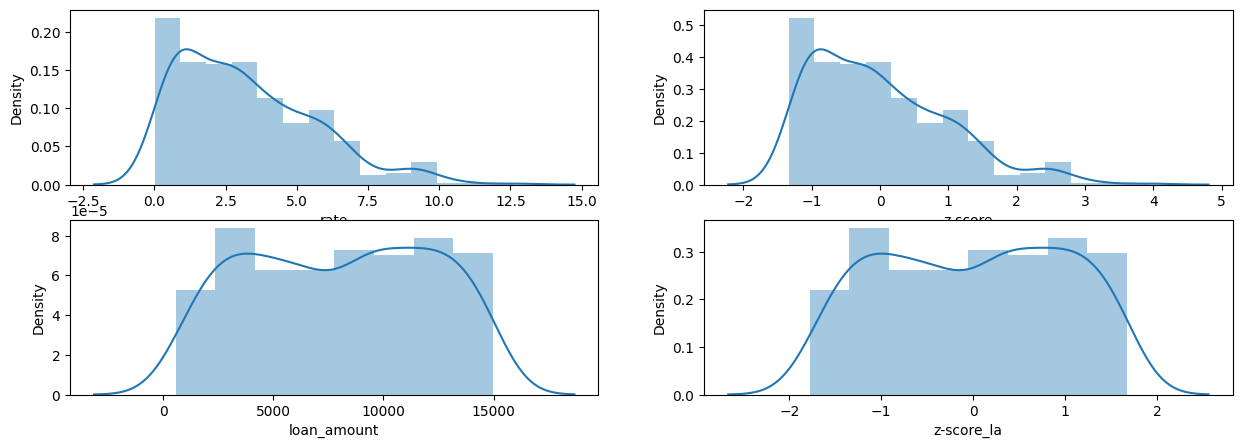

In [58]:
fig,axes=plt.subplots(2,2,figsize=(15,5))

sns.distplot(df3['rate'],ax=axes[0,0])
sns.distplot(df3['z-score'],ax=axes[0,1])
sns.distplot(df3['loan_amount'],ax=axes[1,0])
sns.distplot(df3['z-score_la'],ax=axes[1,1])
plt.show()

In [59]:
df4=df3.copy()

In [60]:
df4.drop(columns=['z-score_la'],inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,z-score
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445174
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.820617
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.058397
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.824788
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036358


In [61]:
from sklearn.preprocessing import StandardScaler

df4_num=df4[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
0,13672,2.15
1,9794,1.25
2,12734,0.68
3,12518,1.24
4,14049,3.13


In [62]:
SS=StandardScaler()

scaled_x=SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

In [63]:
min_rate=df4.rate.min()

In [64]:
max_rate=df4.rate.max()

In [65]:
df4['Min_Max_R']=(df4['rate']-min_rate)/(max_rate-min_rate)


In [66]:

print("The skewness for the original data is {}.".format(df3.rate.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3['z-score'].skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.skew()))



print("The kirtosis for the original data is {}.".format(df3.rate.kurt()))
print("The kirtosis for the Zscore Scaled column is {}.".format(df3['z-score'].kurt()))
print("The kirtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.kurt()))



The skewness for the original data is 0.884204614329943.
The skewness for the Zscore Scaled column is 0.8842046143299428.
The skewness for the Min Max Scaled Data is 0.884204614329943.
The kirtosis for the original data is 0.42437165143736433.
The kirtosis for the Zscore Scaled column is 0.42437165143736566.
The kirtosis for the Min Max Scaled Data is 0.4243716514373639.


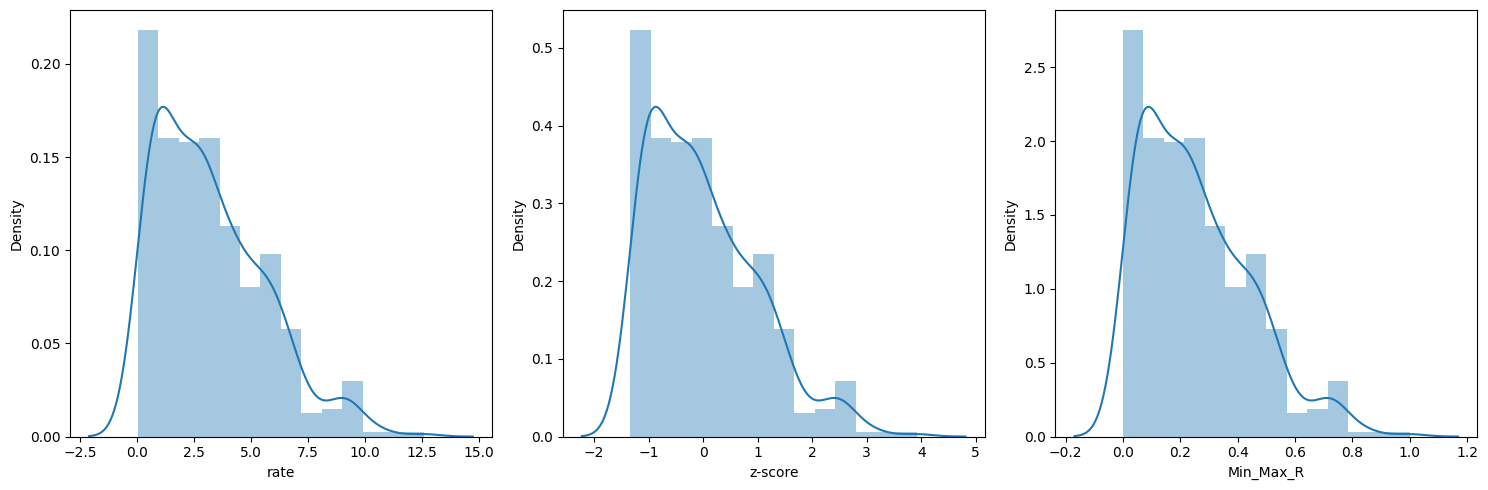

In [67]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.distplot(df3['rate'],ax=axes[0])
sns.distplot(df3['z-score'],ax=axes[1])
sns.distplot(df4['Min_Max_R'],ax=axes[2])
plt.tight_layout()
plt.show()

In [68]:
min_la=df4.loan_amount.min()
max_la=df4.loan_amount.max()
df4['Min_Max_la']=(df4['loan_amount']-min_la)/(max_la-min_la)

In [69]:

print("The skewness for the original data is {}.".format(df4.loan_amount.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3['z-score'].skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_la.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.loan_amount.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3['z-score'].kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_la.kurt()))

The skewness for the original data is -0.04011522267119772.
The skewness for the Zscore Scaled column is 0.8842046143299428.
The skewness for the Min Max Scaled Data is -0.04011522267119812.

The kurtosis for the original data is -1.2320989495947448.
The kurtosis for the Zscore Scaled columns is 0.42437165143736566.
The kurtosis for the Min Max Scaled Data is -1.2320989495947448.


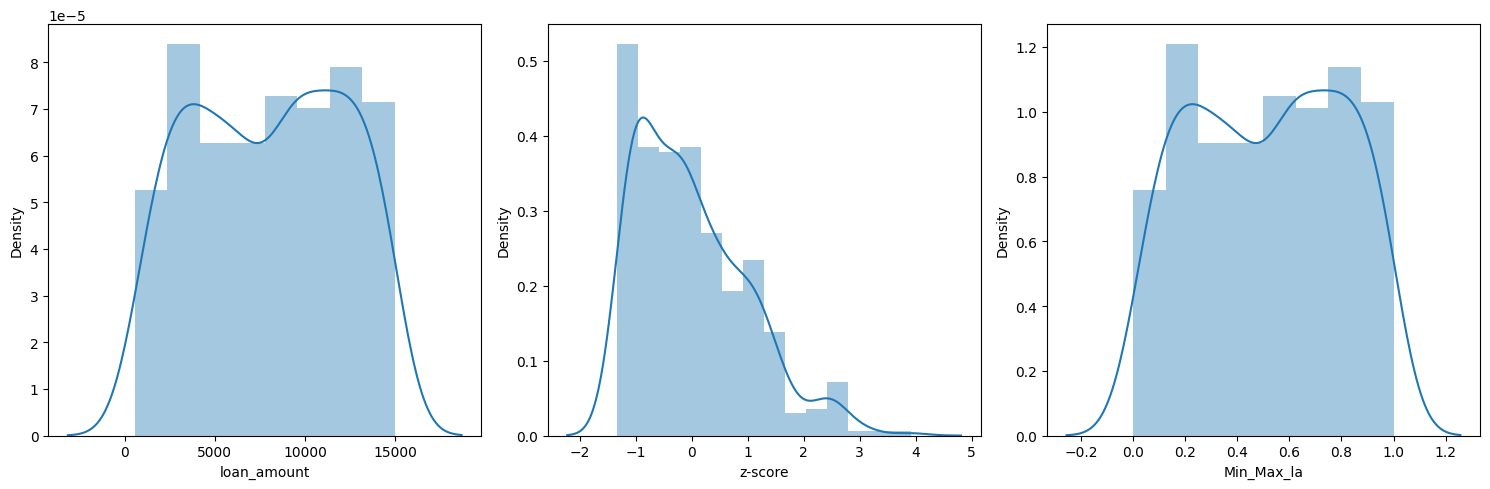

In [70]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['z-score'], ax=axes[1])
sns.distplot(df4['Min_Max_la'], ax=axes[2])

plt.tight_layout()
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
MinMaxScaled=ms.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

In [72]:
df_loans=df3.copy()

In [73]:
df_loans

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,z-score,z-score_la
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445174,1.363488
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.820617,0.434157
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.058397,1.138704
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.824788,1.086941
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036358,1.453833
...,...,...,...,...,...,...,...,...,...,...
438,26945,other,12963,10330,10330,2001-11-26,2004-06-11,2.46,-0.315854,1.193582
439,26945,credit,1728,10248,10248,2004-01-27,2005-06-21,5.27,0.856362,-1.498795
440,26945,other,9329,10154,10154,2001-12-17,2004-07-22,5.65,1.014883,0.322723
441,26945,home,4197,10333,10333,2003-10-16,2005-07-10,4.50,0.535150,-0.907119


In [74]:
df_loans.drop(columns=['z-score_la'],inplace=True)

In [75]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,z-score
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445174
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.820617
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.058397
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.824788
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036358


In [76]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid                 object
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
z-score               float64
dtype: object

In [77]:
df_loans.repaid.head()

0    10243
1    10984
2    10990
3    10596
4    11415
Name: repaid, dtype: object

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
oe=OneHotEncoder(drop='first').fit(df_loans[['loan_type']])
oe.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()
le_t=le.fit(df_loans[['loan_type']])

In [82]:
le_t.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [83]:
le_t.transform(['cash', 'credit', 'home', 'other'])

array([0, 1, 2, 3])

In [84]:
le_t.inverse_transform([0, 1, 2, 3])

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [85]:
import datetime as dt
df_loans['loan_tenure']=df_loans['loan_end']-df_loans['loan_start']

In [86]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,z-score,loan_tenure
0,46109,home,13672,10243,10243,2002-04-16,2003-12-20,2.15,-0.445174,613 days
1,46109,credit,9794,10984,10984,2003-10-21,2005-07-17,1.25,-0.820617,635 days
2,46109,home,12734,10990,10990,2006-02-01,2007-07-05,0.68,-1.058397,519 days
3,46109,cash,12518,10596,10596,2010-12-08,2013-05-05,1.24,-0.824788,879 days
4,46109,credit,14049,11415,11415,2010-07-07,2012-05-21,3.13,-0.036358,684 days


In [87]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                  object
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
z-score                float64
loan_tenure    timedelta64[ns]
dtype: object

In [88]:
df_loans['loan_tenure']=df_loans['loan_tenure'].dt.days


In [89]:
df_loans['loan_tenure']

0      613
1      635
2      519
3      879
4      684
      ... 
438    928
439    511
440    948
441    633
442    638
Name: loan_tenure, Length: 443, dtype: int64

In [90]:
df_loans['loan_tenure']=df_loans['loan_tenure']/365
df_loans['loan_tenure']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
438    2.542466
439    1.400000
440    2.597260
441    1.734247
442    1.747945
Name: loan_tenure, Length: 443, dtype: float64